In [580]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [581]:
dfraw=pd.read_csv('csse_covid_19_daily_reports_us.csv',parse_dates=['Last_Update'])
dfraw

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [582]:
df=pd.read_csv('csse_covid_19_daily_reports_us.csv',parse_dates=['Last_Update'])
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [583]:
df.dtypes

Province_State                  object
Country_Region                  object
Last_Update             datetime64[ns]
Lat                            float64
Long_                          float64
Confirmed                        int64
Deaths                           int64
Recovered                      float64
Active                         float64
FIPS                             int64
Incident_Rate                  float64
People_Tested                  float64
People_Hospitalized            float64
Mortality_Rate                 float64
UID                              int64
ISO3                            object
Testing_Rate                   float64
Hospitalization_Rate           float64
dtype: object

In [584]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province_State        58 non-null     object        
 1   Country_Region        58 non-null     object        
 2   Last_Update           58 non-null     datetime64[ns]
 3   Lat                   56 non-null     float64       
 4   Long_                 56 non-null     float64       
 5   Confirmed             58 non-null     int64         
 6   Deaths                58 non-null     int64         
 7   Recovered             42 non-null     float64       
 8   Active                58 non-null     float64       
 9   FIPS                  58 non-null     int64         
 10  Incident_Rate         56 non-null     float64       
 11  People_Tested         56 non-null     float64       
 12  People_Hospitalized   33 non-null     float64       
 13  Mortality_Rate        

In [586]:
#dtypes: float64(10), int64(4), object(4)

In [587]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


In [588]:
#lets check the null values
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [589]:
df.drop(['Country_Region'], axis=1, inplace=True)# as it only consist of US

In [590]:
df.drop(['Last_Update'],axis=1,inplace=True)#as it also has one value

In [591]:
#Lat,Long_,Recovered,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate

#all are of float type

In [592]:

df['Lat']=df['Lat'].fillna(df['Lat'].mean())

In [593]:
df['Long_']=df['Long_'].fillna(df['Long_'].mean())

In [594]:
df['Recovered']=df['Recovered'].fillna(df['Recovered'].mean())

In [595]:
df['Incident_Rate']=df['Incident_Rate'].fillna(df['Incident_Rate'].mean())

In [596]:
df['People_Tested']=df['People_Tested'].fillna(df['People_Tested'].mean())

In [597]:
df['People_Hospitalized']=df['People_Hospitalized'].fillna(df['People_Hospitalized'].mean())

In [598]:
df['Mortality_Rate']=df['Mortality_Rate'].fillna(df['Mortality_Rate'].mean())

In [599]:
df['Testing_Rate']=df['Testing_Rate'].fillna(df['Testing_Rate'].mean())

In [600]:
df['Hospitalization_Rate']=df['Hospitalization_Rate'].fillna(df['Hospitalization_Rate'].mean())

In [601]:
df.isnull().sum()

Province_State          0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

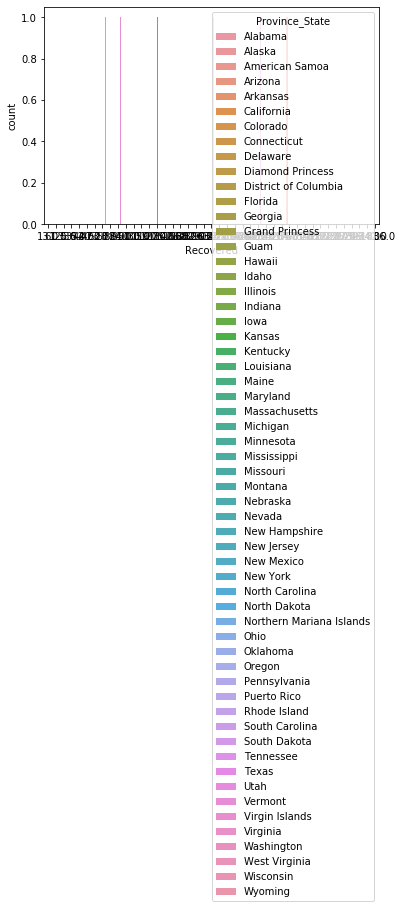

In [602]:
sns.countplot(x="Recovered",hue='Province_State',data=df) 

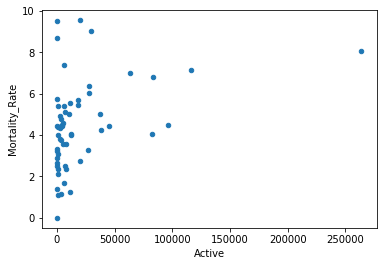

In [603]:
df.plot.scatter(x='Active',y='Mortality_Rate')

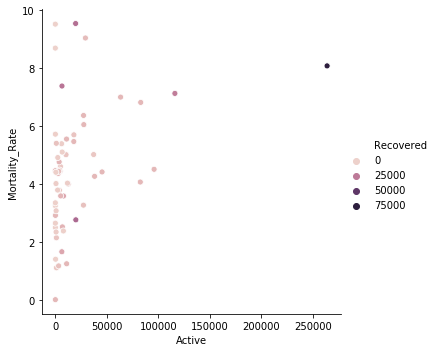

In [604]:
sns.relplot(x='Active',y='Mortality_Rate',hue='Recovered',data=df)

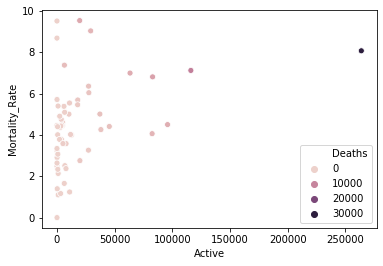

In [605]:
sns.scatterplot(x='Active',y='Mortality_Rate',hue='Deaths',data=df)

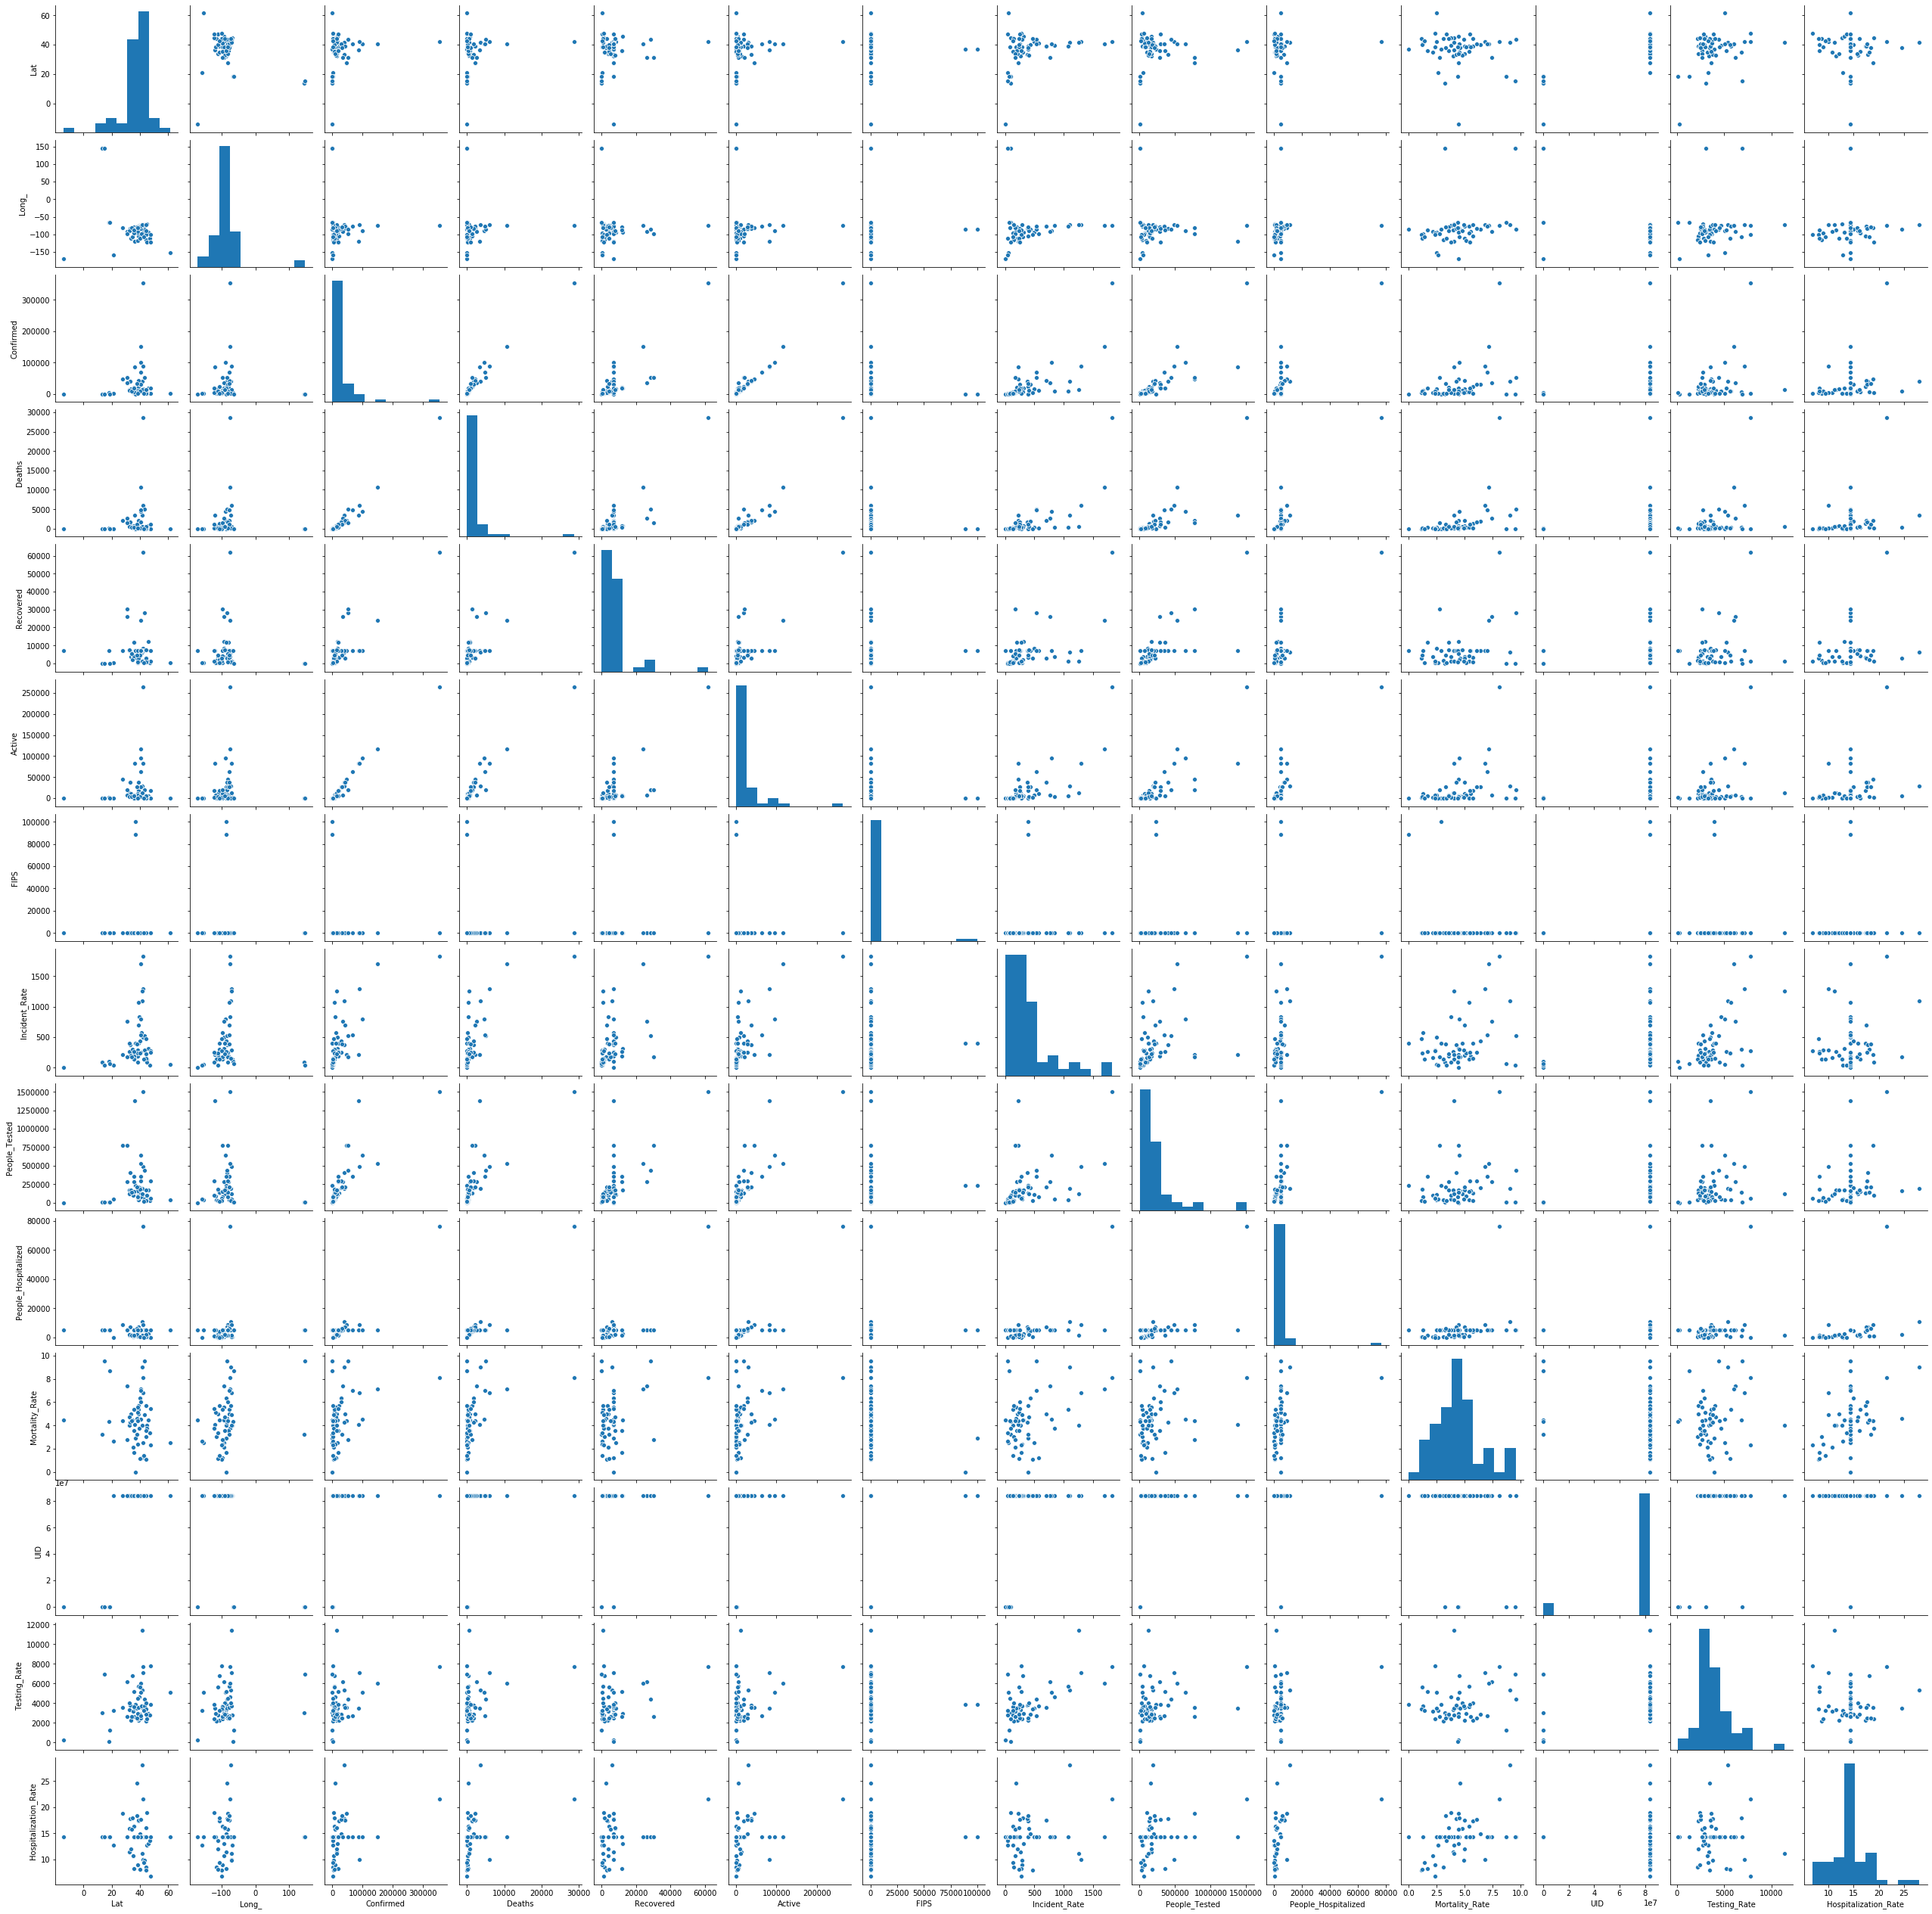

In [606]:
sns.pairplot(df)

In [607]:
df.corr()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
Lat,1.000000,-0.278274,0.120391,0.119685,0.030196,0.119635,-0.000404,0.245693,0.084769,2.645628e-02,-0.134906,7.727677e-01,0.309579,-6.625465e-02
Long_,-0.278274,1.000000,0.009951,0.028690,-0.041588,0.011604,0.000396,0.041318,-0.077781,7.967739e-02,0.297192,-5.259975e-01,0.190191,7.138145e-02
Confirmed,0.120391,0.009951,1.000000,0.982191,0.822547,0.985218,-0.096696,0.708436,0.824136,8.692673e-01,0.382537,1.539717e-01,0.332464,2.874708e-01
Deaths,0.119685,0.028690,0.982191,1.000000,0.830223,0.954378,-0.075053,0.710105,0.739634,9.082786e-01,0.427127,1.200429e-01,0.344465,2.982254e-01
Recovered,0.030196,-0.041588,0.822547,0.830223,1.000000,0.725085,-0.000012,0.542795,0.711255,7.618294e-01,0.322160,1.303142e-01,0.220597,2.316917e-01
Active,0.119635,0.011604,0.985218,0.954378,0.725085,1.000000,-0.092276,0.700926,0.826144,8.359377e-01,0.367626,1.463538e-01,0.321395,2.845637e-01
FIPS,-0.000404,0.000396,-0.096696,-0.075053,-0.000012,-0.092276,1.000000,-0.000237,-0.000209,9.150251e-06,-0.262178,5.802216e-02,-0.000100,-1.176128e-04
Incident_Rate,0.245693,0.041318,0.708436,0.710105,0.542795,0.700926,-0.000237,1.000000,0.441669,5.510764e-01,0.353882,2.643102e-01,0.620621,1.960289e-01
People_Tested,0.084769,-0.077781,0.824136,0.739634,0.711255,0.826144,-0.000209,0.441669,1.000000,6.420913e-01,0.220200,2.356350e-01,0.230753,2.526802e-01
People_Hospitalized,0.026456,0.079677,0.869267,0.908279,0.761829,0.835938,0.000009,0.551076,0.642091,1.000000e+00,0.334335,6.697668e-09,0.270255,3.775863e-01


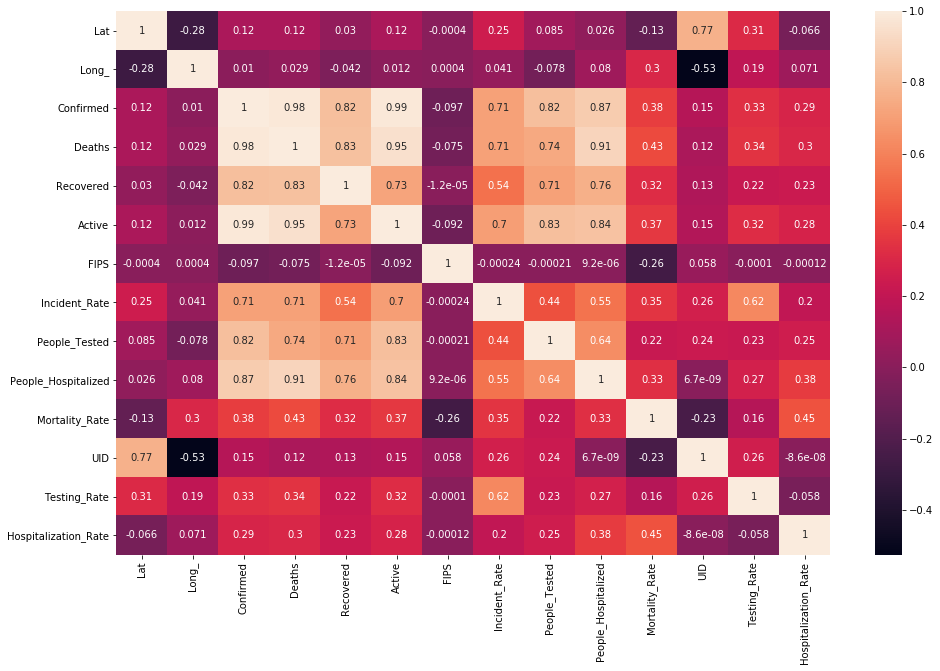

In [608]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

In [609]:
#Recovered  is correlated with Confirmed,Deaths,Active,Incident_RAte,People_Hospitalized,Mortality_Rate

In [610]:
#Deaths is correlated withConfirmed,Recovered,Active,Inciden_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate

In [611]:
df.skew()

Lat                    -2.250097
Long_                   3.567919
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
UID                    -3.027480
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

In [612]:
#Lets treat the skewness
import numpy as np
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.cbrt(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.cbrt(df[index])

df.skew()

Lat                    -6.316456
Long_                   4.974515
Confirmed               0.889587
Deaths                  1.343044
Recovered               0.615322
Active                  0.938524
FIPS                    5.169605
Incident_Rate           0.233011
People_Tested           0.452959
People_Hospitalized     1.345398
Mortality_Rate          0.496115
UID                    -3.027680
Testing_Rate           -2.311257
Hospitalization_Rate    0.007326
dtype: float64

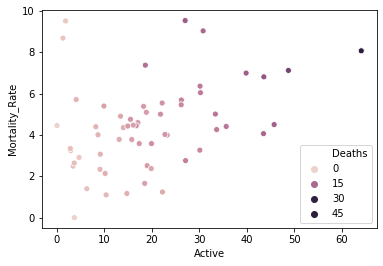

In [613]:
sns.scatterplot(x='Active',y='Mortality_Rate',hue='Deaths',data=df)

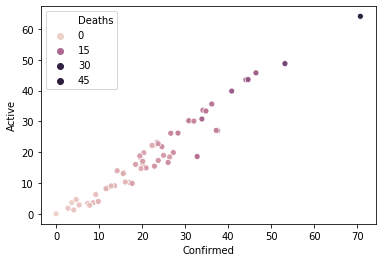

In [614]:
sns.scatterplot(x='Confirmed',y='Active',hue='Deaths',data=df)

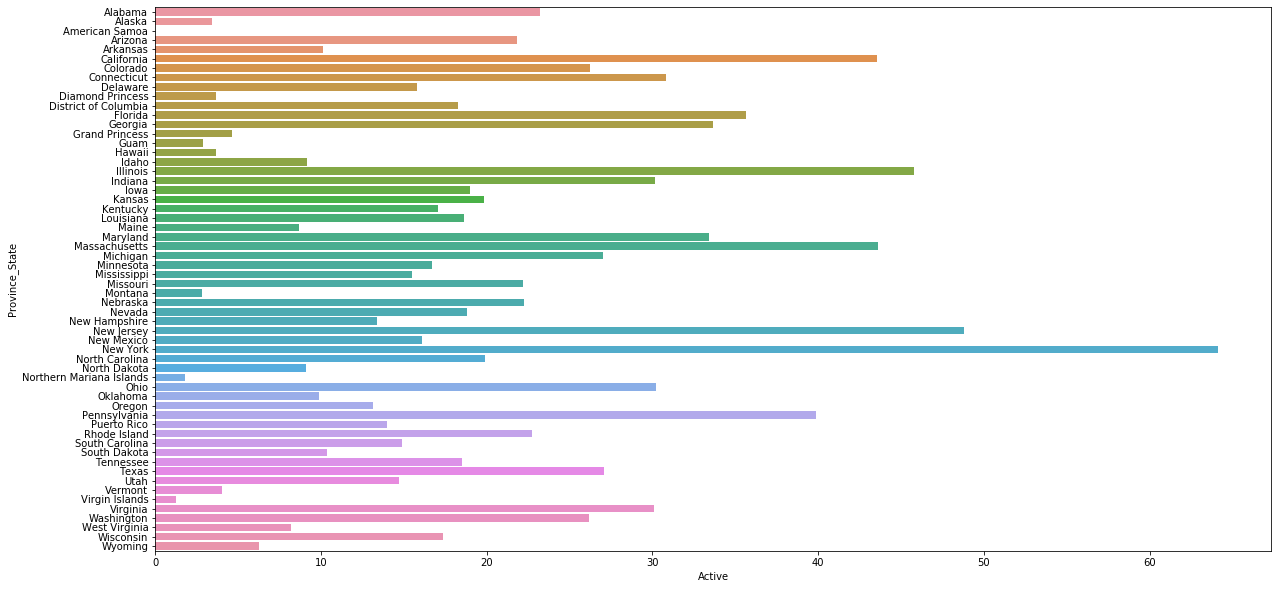

In [615]:
plt.figure(figsize=(20,10))
sns.barplot(x='Active', y = 'Province_State',data= df)

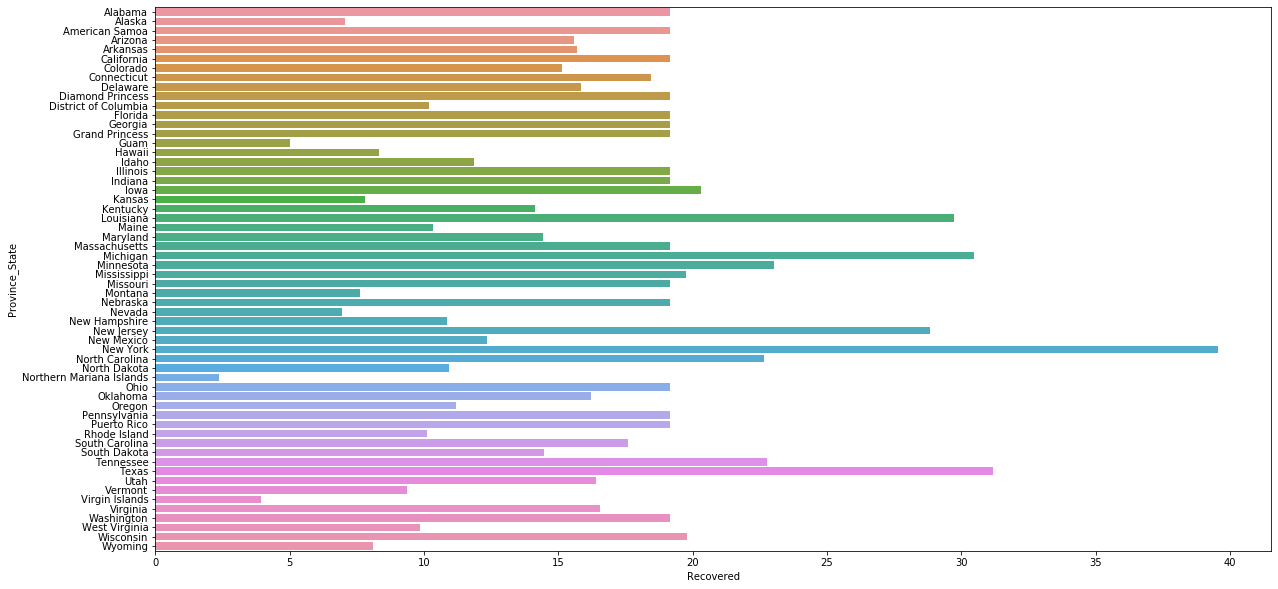

In [616]:
plt.figure(figsize=(20,10))
sns.barplot(x='Recovered', y = 'Province_State',data= df)

In [617]:
#label encode
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Province_State'] = le.fit_transform(df['Province_State'])
df['ISO3'] = le.fit_transform(df['ISO3'])

In [618]:
df.head(10)

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,3.185291,-4.429388,23.544656,8.051748,19.136076,23.226496,1.000000,6.432793,54.787055,11.429308,3.999387,437.951916,4,2.464498,2.253171
1,1,3.944455,-5.341532,7.374198,2.154435,7.060697,3.391211,1.259921,3.798695,33.335722,16.982051,2.493766,437.951917,4,2.579941,2.429641
2,2,-2.425594,-5.541092,0.000000,0.000000,19.136076,0.000000,3.914868,0.000000,4.986631,16.982051,4.458248,2.519842,0,1.823442,2.429641
3,3,3.231007,-4.812111,24.610496,9.073473,15.567861,21.818059,1.587401,5.894343,54.896223,12.146356,5.011405,437.951921,4,2.360220,2.290827
4,4,3.270122,-4.520452,17.103179,4.747459,15.675766,10.144567,1.709976,5.493467,45.829552,8.118041,2.138717,437.951923,4,2.450784,2.203135
5,5,3.305476,-4.928058,44.139536,15.178606,19.136076,43.532938,1.817121,6.015207,111.336855,16.982051,4.066421,437.951924,4,2.475639,2.429641
6,6,3.392944,-4.722349,28.354755,10.911130,15.151066,26.217117,2.000000,7.342605,50.895467,15.814258,5.698118,437.951928,4,2.362115,2.588747
7,7,3.464895,-4.174666,33.917041,15.224763,18.433901,30.802069,2.080084,10.305122,57.561296,22.203349,9.044775,437.951930,4,2.595704,3.038556
8,8,3.400418,-4.226647,20.160377,6.767899,15.827576,15.766129,2.154435,9.440915,35.677155,16.982051,3.783256,437.951931,4,2.556438,2.429641
9,9,3.327414,-4.400389,3.659306,0.000000,19.136076,3.659306,44.628715,7.344847,60.898821,16.982051,0.000000,438.106338,4,2.505735,2.429641


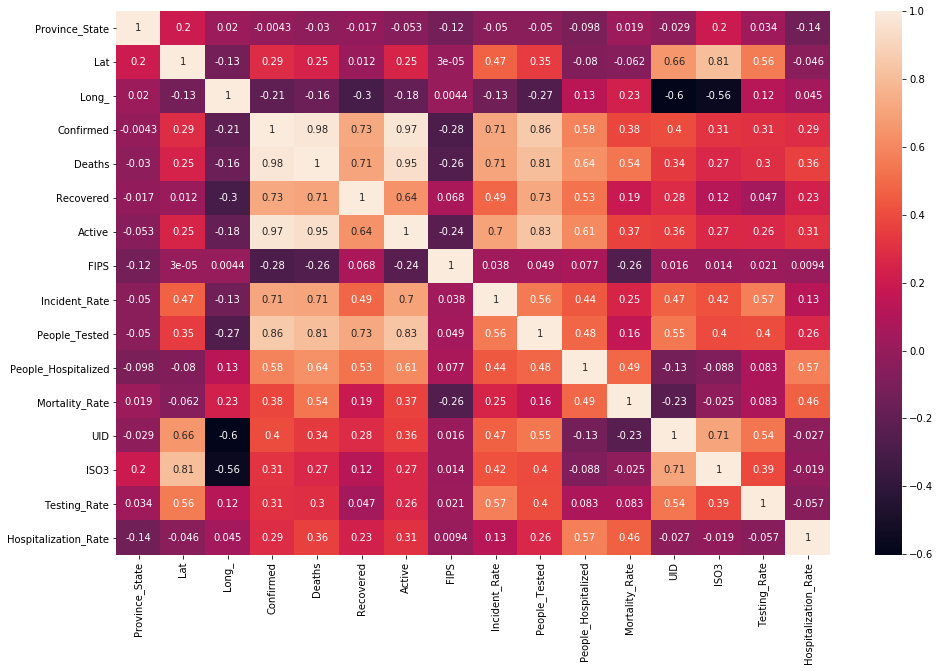

In [619]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

In [620]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z
threshold=3
print(np.where(z>3))

(array([ 2,  2,  2,  2,  2,  9, 13, 14, 14, 14, 36, 36, 36, 36, 36, 39, 39,
       44, 44, 52], dtype=int64), array([ 1,  8, 12, 13, 14,  7,  7,  2, 12, 13,  3,  4,  5,  6, 10,  2, 12,
       12, 14, 12], dtype=int64))


In [621]:
dfnew=df[(z<3).all(axis=1)]
df.shape,dfnew.shape

((58, 16), (50, 16))

In [622]:
dfdeaths=pd.get_dummies(dfnew,drop_first=True)

In [623]:
dfrecovered=pd.get_dummies(dfnew,drop_first=True)

In [624]:
dfdeaths.head(10)

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,3.185291,-4.429388,23.544656,8.051748,19.136076,23.226496,1.000000,6.432793,54.787055,11.429308,3.999387,437.951916,4,2.464498,2.253171
1,1,3.944455,-5.341532,7.374198,2.154435,7.060697,3.391211,1.259921,3.798695,33.335722,16.982051,2.493766,437.951917,4,2.579941,2.429641
3,3,3.231007,-4.812111,24.610496,9.073473,15.567861,21.818059,1.587401,5.894343,54.896223,12.146356,5.011405,437.951921,4,2.360220,2.290827
4,4,3.270122,-4.520452,17.103179,4.747459,15.675766,10.144567,1.709976,5.493467,45.829552,8.118041,2.138717,437.951923,4,2.450784,2.203135
5,5,3.305476,-4.928058,44.139536,15.178606,19.136076,43.532938,1.817121,6.015207,111.336855,16.982051,4.066421,437.951924,4,2.475639,2.429641
6,6,3.392944,-4.722349,28.354755,10.911130,15.151066,26.217117,2.000000,7.342605,50.895467,15.814258,5.698118,437.951928,4,2.362115,2.588747
7,7,3.464895,-4.174666,33.917041,15.224763,18.433901,30.802069,2.080084,10.305122,57.561296,22.203349,9.044775,437.951930,4,2.595704,3.038556
8,8,3.400418,-4.226647,20.160377,6.767899,15.827576,15.766129,2.154435,9.440915,35.677155,16.982051,3.783256,437.951931,4,2.556438,2.429641
10,10,3.388235,-4.254814,19.618607,7.410795,10.192921,18.256612,2.223980,10.227859,34.318518,16.982051,5.390015,437.951933,4,2.615462,2.429641
11,11,3.028117,-4.338943,36.208410,12.797656,19.136076,35.667462,2.289428,6.046164,91.710020,20.749867,4.415327,437.951935,4,2.483299,2.659944


In [625]:
dfrecovered.head(10)

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,3.185291,-4.429388,23.544656,8.051748,19.136076,23.226496,1.000000,6.432793,54.787055,11.429308,3.999387,437.951916,4,2.464498,2.253171
1,1,3.944455,-5.341532,7.374198,2.154435,7.060697,3.391211,1.259921,3.798695,33.335722,16.982051,2.493766,437.951917,4,2.579941,2.429641
3,3,3.231007,-4.812111,24.610496,9.073473,15.567861,21.818059,1.587401,5.894343,54.896223,12.146356,5.011405,437.951921,4,2.360220,2.290827
4,4,3.270122,-4.520452,17.103179,4.747459,15.675766,10.144567,1.709976,5.493467,45.829552,8.118041,2.138717,437.951923,4,2.450784,2.203135
5,5,3.305476,-4.928058,44.139536,15.178606,19.136076,43.532938,1.817121,6.015207,111.336855,16.982051,4.066421,437.951924,4,2.475639,2.429641
6,6,3.392944,-4.722349,28.354755,10.911130,15.151066,26.217117,2.000000,7.342605,50.895467,15.814258,5.698118,437.951928,4,2.362115,2.588747
7,7,3.464895,-4.174666,33.917041,15.224763,18.433901,30.802069,2.080084,10.305122,57.561296,22.203349,9.044775,437.951930,4,2.595704,3.038556
8,8,3.400418,-4.226647,20.160377,6.767899,15.827576,15.766129,2.154435,9.440915,35.677155,16.982051,3.783256,437.951931,4,2.556438,2.429641
10,10,3.388235,-4.254814,19.618607,7.410795,10.192921,18.256612,2.223980,10.227859,34.318518,16.982051,5.390015,437.951933,4,2.615462,2.429641
11,11,3.028117,-4.338943,36.208410,12.797656,19.136076,35.667462,2.289428,6.046164,91.710020,20.749867,4.415327,437.951935,4,2.483299,2.659944


In [626]:
df.head(10)

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,3.185291,-4.429388,23.544656,8.051748,19.136076,23.226496,1.000000,6.432793,54.787055,11.429308,3.999387,437.951916,4,2.464498,2.253171
1,1,3.944455,-5.341532,7.374198,2.154435,7.060697,3.391211,1.259921,3.798695,33.335722,16.982051,2.493766,437.951917,4,2.579941,2.429641
2,2,-2.425594,-5.541092,0.000000,0.000000,19.136076,0.000000,3.914868,0.000000,4.986631,16.982051,4.458248,2.519842,0,1.823442,2.429641
3,3,3.231007,-4.812111,24.610496,9.073473,15.567861,21.818059,1.587401,5.894343,54.896223,12.146356,5.011405,437.951921,4,2.360220,2.290827
4,4,3.270122,-4.520452,17.103179,4.747459,15.675766,10.144567,1.709976,5.493467,45.829552,8.118041,2.138717,437.951923,4,2.450784,2.203135
5,5,3.305476,-4.928058,44.139536,15.178606,19.136076,43.532938,1.817121,6.015207,111.336855,16.982051,4.066421,437.951924,4,2.475639,2.429641
6,6,3.392944,-4.722349,28.354755,10.911130,15.151066,26.217117,2.000000,7.342605,50.895467,15.814258,5.698118,437.951928,4,2.362115,2.588747
7,7,3.464895,-4.174666,33.917041,15.224763,18.433901,30.802069,2.080084,10.305122,57.561296,22.203349,9.044775,437.951930,4,2.595704,3.038556
8,8,3.400418,-4.226647,20.160377,6.767899,15.827576,15.766129,2.154435,9.440915,35.677155,16.982051,3.783256,437.951931,4,2.556438,2.429641
9,9,3.327414,-4.400389,3.659306,0.000000,19.136076,3.659306,44.628715,7.344847,60.898821,16.982051,0.000000,438.106338,4,2.505735,2.429641


In [627]:
dfnew.head(10)

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,3.185291,-4.429388,23.544656,8.051748,19.136076,23.226496,1.000000,6.432793,54.787055,11.429308,3.999387,437.951916,4,2.464498,2.253171
1,1,3.944455,-5.341532,7.374198,2.154435,7.060697,3.391211,1.259921,3.798695,33.335722,16.982051,2.493766,437.951917,4,2.579941,2.429641
3,3,3.231007,-4.812111,24.610496,9.073473,15.567861,21.818059,1.587401,5.894343,54.896223,12.146356,5.011405,437.951921,4,2.360220,2.290827
4,4,3.270122,-4.520452,17.103179,4.747459,15.675766,10.144567,1.709976,5.493467,45.829552,8.118041,2.138717,437.951923,4,2.450784,2.203135
5,5,3.305476,-4.928058,44.139536,15.178606,19.136076,43.532938,1.817121,6.015207,111.336855,16.982051,4.066421,437.951924,4,2.475639,2.429641
6,6,3.392944,-4.722349,28.354755,10.911130,15.151066,26.217117,2.000000,7.342605,50.895467,15.814258,5.698118,437.951928,4,2.362115,2.588747
7,7,3.464895,-4.174666,33.917041,15.224763,18.433901,30.802069,2.080084,10.305122,57.561296,22.203349,9.044775,437.951930,4,2.595704,3.038556
8,8,3.400418,-4.226647,20.160377,6.767899,15.827576,15.766129,2.154435,9.440915,35.677155,16.982051,3.783256,437.951931,4,2.556438,2.429641
10,10,3.388235,-4.254814,19.618607,7.410795,10.192921,18.256612,2.223980,10.227859,34.318518,16.982051,5.390015,437.951933,4,2.615462,2.429641
11,11,3.028117,-4.338943,36.208410,12.797656,19.136076,35.667462,2.289428,6.046164,91.710020,20.749867,4.415327,437.951935,4,2.483299,2.659944


# MachineLearning

In [628]:
y=dfdeaths['Deaths']
dfdeaths.drop(['Deaths'],axis=1, inplace=True)
x=dfdeaths


In [629]:
x

,Province_State,Lat,Long_,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,3.185291,-4.429388,23.544656,19.136076,23.226496,1.000000,6.432793,54.787055,11.429308,3.999387,437.951916,4,2.464498,2.253171
1,1,3.944455,-5.341532,7.374198,7.060697,3.391211,1.259921,3.798695,33.335722,16.982051,2.493766,437.951917,4,2.579941,2.429641
3,3,3.231007,-4.812111,24.610496,15.567861,21.818059,1.587401,5.894343,54.896223,12.146356,5.011405,437.951921,4,2.360220,2.290827
4,4,3.270122,-4.520452,17.103179,15.675766,10.144567,1.709976,5.493467,45.829552,8.118041,2.138717,437.951923,4,2.450784,2.203135
5,5,3.305476,-4.928058,44.139536,19.136076,43.532938,1.817121,6.015207,111.336855,16.982051,4.066421,437.951924,4,2.475639,2.429641
6,6,3.392944,-4.722349,28.354755,15.151066,26.217117,2.000000,7.342605,50.895467,15.814258,5.698118,437.951928,4,2.362115,2.588747
7,7,3.464895,-4.174666,33.917041,18.433901,30.802069,2.080084,10.305122,57.561296,22.203349,9.044775,437.951930,4,2.595704,3.038556
8,8,3.400418,-4.226647,20.160377,15.827576,15.766129,2.154435,9.440915,35.677155,16.982051,3.783256,437.951931,4,2.556438,2.429641
10,10,3.388235,-4.254814,19.618607,10.192921,18.256612,2.223980,10.227859,34.318518,16.982051,5.390015,437.951933,4,2.615462,2.429641
11,11,3.028117,-4.338943,36.208410,19.136076,35.667462,2.289428,6.046164,91.710020,20.749867,4.415327,437.951935,4,2.483299,2.659944


In [630]:
y

0      8.051748
1      2.154435
3      9.073473
4      4.747459
5     15.178606
6     10.911130
7     15.224763
8      6.767899
10     7.410795
11    12.797656
12    11.927807
15     2.571282
16     4.254321
17    16.540153
18    12.306899
19     7.324829
20     5.867464
21     7.217652
22    13.764778
23     4.179339
24    12.852373
25    18.237591
26    17.167887
27     9.228707
28     8.291344
29     8.617739
30     2.519842
31     5.167649
32     7.224045
33     5.748897
34    22.069340
35     6.565414
37     8.987637
38     3.659306
40    12.121452
41     6.686883
42     5.241483
43    16.833437
45     8.133187
46     7.410795
47     3.583048
48     6.731315
49    11.255717
50     4.481405
51     3.779763
53    10.243998
54    10.121843
55     4.101566
56     7.835169
57     2.223980
Name: Deaths, dtype: float64

In [631]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
def maxr2_score(regr,newx,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(newx, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [632]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [633]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
final_r_state=maxr2_score(lnr,newx,y)

r2 score corresponding to  42  is  0.9511347912580256
r2 score corresponding to  43  is  0.9715133296377403
r2 score corresponding to  44  is  0.9579633219208812
r2 score corresponding to  45  is  0.9748148121758469
r2 score corresponding to  46  is  0.9472382536761843
r2 score corresponding to  47  is  0.9152104737757206
r2 score corresponding to  48  is  0.8047894701508068
r2 score corresponding to  49  is  0.9479850276810962
r2 score corresponding to  50  is  0.6892659765685707
r2 score corresponding to  51  is  0.8040939960096561
r2 score corresponding to  52  is  0.9447329916545247
r2 score corresponding to  53  is  0.8996736198111879
r2 score corresponding to  54  is  0.9356459937059474
r2 score corresponding to  55  is  0.9154165499743241
r2 score corresponding to  56  is  0.9262347559107598
r2 score corresponding to  57  is  0.9368641934127279
r2 score corresponding to  58  is  0.9134300017997077
r2 score corresponding to  59  is  0.7574580549820009
r2 score corresponding to  6

In [634]:
#lets check for overfitting or underfitting for this model
print("Linear regression\n\n")
model_evaluation(lnr,newx,y)

Linear regression


Mean r2 score for regressor:  0.8396107987366083
standard deviation in r2 score for regressor:  0.19693424336856336
[0.45061116 0.93789068 0.98754574 0.93170746 0.89029895]


In [635]:
#final Model

In [636]:
x_train,x_test, y_train, y_test = train_test_split(x, y,random_state = 66,test_size=0.30)
lnr.fit(x_train,y_train)
lnrpred=lnr.predict(x_test)


In [637]:
print('R2 score',r2_score(lnrpred,y_test))
print('Mean Absolute Error',mean_absolute_error(lnrpred,y_test))
print('Mean Squared Error',mean_squared_error(lnrpred,y_test))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(lnrpred,y_test)))

R2 score 0.9884775344334719
Mean Absolute Error 0.39457413151349335
Mean Squared Error 0.26589217467580845
Root Mean Squared Error 0.5156473355655088


In [638]:
rfr=RandomForestRegressor(n_estimators=150)
maxr2_score(rfr,newx,y)

r2 score corresponding to  42  is  0.8565865815136386
r2 score corresponding to  43  is  0.9474112425590713
r2 score corresponding to  44  is  0.9297191090809287
r2 score corresponding to  45  is  0.971666977447075
r2 score corresponding to  46  is  0.9716261996306778
r2 score corresponding to  47  is  0.7781536592551006
r2 score corresponding to  48  is  0.887365332429203
r2 score corresponding to  49  is  0.8212078973875193
r2 score corresponding to  50  is  0.9015635143047728
r2 score corresponding to  51  is  0.9659222129942682
r2 score corresponding to  52  is  0.9720747008328067
r2 score corresponding to  53  is  0.9719051449149795
r2 score corresponding to  54  is  0.9064815438011138
r2 score corresponding to  55  is  0.9075477292554117
r2 score corresponding to  56  is  0.7973773959099795
r2 score corresponding to  57  is  0.8382071206481125
r2 score corresponding to  58  is  0.7758047149584937
r2 score corresponding to  59  is  0.8987391744104946
r2 score corresponding to  60 

91

In [639]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=150,random_state=45)
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)


In [640]:
print('R2 score',r2_score(rfpred,y_test))
print('Mean Absolute Error',mean_absolute_error(rfpred,y_test))
print('Mean Squared Error',mean_squared_error(rfpred,y_test))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(rfpred,y_test)))

R2 score 0.8012600922752012
Mean Absolute Error 1.7077775567205464
Mean Squared Error 4.589772868726372
Root Mean Squared Error 2.1423755200072585


In [683]:
#lets use  as our final model
x_train, x_test, y_train, y_test = train_test_split(newx, y,random_state = 41,test_size=0.20)
lnr=LinearRegression()
lnr.fit(x_train,y_train)
y_pred = lnr.predict(x_test)

In [684]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred) )
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

RMSE is:  1.2547432561029876
r2_score is:  0.9037199227626154
Mean squared error: 1.57


In [685]:
import joblib
joblib.dump(lnr,'deathpred.obj')

['deathpred.obj']

# MachineLearning 

In [641]:
y1=dfrecovered['Recovered']
dfrecovered.drop(['Recovered'],axis=1, inplace=True)
x1=dfrecovered
print(x1.shape)
print(y1.shape)

(50, 15)
(50,)


In [642]:
x1

,Province_State,Lat,Long_,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,3.185291,-4.429388,23.544656,8.051748,23.226496,1.000000,6.432793,54.787055,11.429308,3.999387,437.951916,4,2.464498,2.253171
1,1,3.944455,-5.341532,7.374198,2.154435,3.391211,1.259921,3.798695,33.335722,16.982051,2.493766,437.951917,4,2.579941,2.429641
3,3,3.231007,-4.812111,24.610496,9.073473,21.818059,1.587401,5.894343,54.896223,12.146356,5.011405,437.951921,4,2.360220,2.290827
4,4,3.270122,-4.520452,17.103179,4.747459,10.144567,1.709976,5.493467,45.829552,8.118041,2.138717,437.951923,4,2.450784,2.203135
5,5,3.305476,-4.928058,44.139536,15.178606,43.532938,1.817121,6.015207,111.336855,16.982051,4.066421,437.951924,4,2.475639,2.429641
6,6,3.392944,-4.722349,28.354755,10.911130,26.217117,2.000000,7.342605,50.895467,15.814258,5.698118,437.951928,4,2.362115,2.588747
7,7,3.464895,-4.174666,33.917041,15.224763,30.802069,2.080084,10.305122,57.561296,22.203349,9.044775,437.951930,4,2.595704,3.038556
8,8,3.400418,-4.226647,20.160377,6.767899,15.766129,2.154435,9.440915,35.677155,16.982051,3.783256,437.951931,4,2.556438,2.429641
10,10,3.388235,-4.254814,19.618607,7.410795,18.256612,2.223980,10.227859,34.318518,16.982051,5.390015,437.951933,4,2.615462,2.429641
11,11,3.028117,-4.338943,36.208410,12.797656,35.667462,2.289428,6.046164,91.710020,20.749867,4.415327,437.951935,4,2.483299,2.659944


In [643]:
y1

0     19.136076
1      7.060697
3     15.567861
4     15.675766
5     19.136076
6     15.151066
7     18.433901
8     15.827576
10    10.192921
11    19.136076
12    19.136076
15     8.329954
16    11.859472
17    19.136076
18    19.136076
19    20.297228
20     7.791488
21    14.138089
22    29.719232
23    10.322801
24    14.411269
25    19.136076
26    30.450246
27    23.037745
28    19.730553
29    19.136076
30     7.605905
31    19.136076
32     6.952053
33    10.843514
34    28.822940
35    12.346387
37    22.661066
38    10.919523
40    19.136076
41    16.218361
42    11.202848
43    19.136076
45    10.099016
46    17.599165
47    14.459259
48    22.755443
49    31.189611
50    16.414928
51     9.375096
53    16.537716
54    19.136076
55     9.830476
56    19.770715
57     8.082480
Name: Recovered, dtype: float64

In [644]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(x1)
newx1=scaler.transform(x1)
print(newx1)

[[-1.74119525e+00 -1.16942835e+00  3.22028309e-01 -9.34069887e-02
  -1.42209044e-01  2.16917180e-01 -2.77811532e+00 -2.22884714e-01
   6.66773394e-03 -4.62927677e-01 -1.85713106e-01 -1.76066230e+00
   0.00000000e+00 -2.87084152e-01 -6.74696302e-01]
 [-1.68090455e+00  3.09338695e+00 -2.81178928e+00 -1.60425687e+00
  -1.42033274e+00 -1.51856014e+00 -2.40210691e+00 -1.60755349e+00
  -1.17208971e+00  6.81832669e-01 -9.92462499e-01 -1.69737464e+00
   0.00000000e+00  8.50435903e-01  1.28121850e-01]
 [-1.56032317e+00 -9.12723198e-01 -9.92876221e-01  6.17734210e-03
   7.92291906e-02  9.36867586e-02 -1.92836600e+00 -5.05932198e-01
   1.26665305e-02 -3.15100195e-01  3.56551139e-01 -1.57079934e+00
   0.00000000e+00 -1.31457763e+00 -5.03388487e-01]
 [-1.50003247e+00 -6.93087409e-01  9.16509906e-03 -6.95251746e-01
  -8.58346930e-01 -9.27679031e-01 -1.75104604e+00 -7.16661410e-01
  -4.85549867e-01 -1.14558250e+00 -1.18270648e+00 -1.50751168e+00
   0.00000000e+00 -4.22207551e-01 -9.02329740e-01]
 [-1

In [645]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
def maxr2_score(regr,newx1,y1):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(newx1, y1,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [646]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [660]:
from sklearn.linear_model import LinearRegression
lnr1=LinearRegression()
final_r_state=maxr2_score(lnr1,newx1,y1)

r2 score corresponding to  42  is  0.68847214310778
r2 score corresponding to  43  is  -0.08914520013614613
r2 score corresponding to  44  is  -0.715323810039193
r2 score corresponding to  45  is  -0.33120003516174346
r2 score corresponding to  46  is  0.11540655294903457
r2 score corresponding to  47  is  0.9239165377462124
r2 score corresponding to  48  is  0.36528962329955683
r2 score corresponding to  49  is  -0.5100982952418305
r2 score corresponding to  50  is  0.429744876869564
r2 score corresponding to  51  is  -0.10050189072407933
r2 score corresponding to  52  is  0.8303511753317729
r2 score corresponding to  53  is  0.28085992798794623
r2 score corresponding to  54  is  0.6526660219765771
r2 score corresponding to  55  is  0.8399738402369687
r2 score corresponding to  56  is  0.5602339217165491
r2 score corresponding to  57  is  0.8047071573872161
r2 score corresponding to  58  is  0.5065535133928731
r2 score corresponding to  59  is  0.793000164323766
r2 score corresponding

In [648]:
#lets check for overfitting or underfitting for this model
print("Linear regression\n\n")
model_evaluation(lnr,newx1,y1)

Linear regression


Mean r2 score for regressor:  0.5119741927509023
standard deviation in r2 score for regressor:  0.49423551018952655
[-0.45988022  0.87463557  0.67247785  0.83352208  0.63911567]


In [649]:
regr1=DecisionTreeRegressor()
final_r_state=maxr2_score(regr1,newx1,y1)

r2 score corresponding to  42  is  0.29262632287804125
r2 score corresponding to  43  is  0.05833573039527773
r2 score corresponding to  44  is  -1.0815625684132204
r2 score corresponding to  45  is  -1.080322805346583
r2 score corresponding to  46  is  0.12168076391717886
r2 score corresponding to  47  is  0.01875186976872678
r2 score corresponding to  48  is  -0.660047271589181
r2 score corresponding to  49  is  0.07340199173975859
r2 score corresponding to  50  is  0.4975885455650546
r2 score corresponding to  51  is  -0.05781605559443337
r2 score corresponding to  52  is  -1.3067624581014434
r2 score corresponding to  53  is  0.07179584359562408
r2 score corresponding to  54  is  -0.2416803636919811
r2 score corresponding to  55  is  0.3094688064772474
r2 score corresponding to  56  is  -0.29285341778765406
r2 score corresponding to  57  is  -0.2793831606637551
r2 score corresponding to  58  is  0.36434727904093633
r2 score corresponding to  59  is  0.4117985779035568
r2 score corr

In [650]:
print("Decision Tree regression\n\n")
model_evaluation(regr1,newx1,y1)

Decision Tree regression


Mean r2 score for regressor:  -0.24182427875942297
standard deviation in r2 score for regressor:  1.1281475260660356
[-2.48509187  0.13369492  0.33303679  0.29490163  0.51433715]


In [651]:
#using grid search for optimal value of k in knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':range(2,30)}
knr1 = KNeighborsRegressor()
clf = GridSearchCV(knr1, parameters, cv=5)
clf.fit(newx1,y1)
clf.best_params_

{'n_neighbors': 14}

In [658]:
knr1=KNeighborsRegressor(n_neighbors=14)
final_r_state=maxr2_score(knr1,newx1,y1)

r2 score corresponding to  42  is  0.49392295355024796
r2 score corresponding to  43  is  -0.42459090457776294
r2 score corresponding to  44  is  -0.0017206557631346264
r2 score corresponding to  45  is  0.27101808764813884
r2 score corresponding to  46  is  0.5759538429083881
r2 score corresponding to  47  is  0.16018147521725457
r2 score corresponding to  48  is  -0.30446758372029614
r2 score corresponding to  49  is  -0.11434593175102559
r2 score corresponding to  50  is  -0.26538950016598806
r2 score corresponding to  51  is  0.040206566584296
r2 score corresponding to  52  is  0.21603129658559983
r2 score corresponding to  53  is  0.017397587607464682
r2 score corresponding to  54  is  0.1286832209318739
r2 score corresponding to  55  is  0.34368091210315355
r2 score corresponding to  56  is  0.06874052435604616
r2 score corresponding to  57  is  0.345439715656481
r2 score corresponding to  58  is  0.08854683732962088
r2 score corresponding to  59  is  0.21153794858718244
r2 score

In [653]:
print("Knn regression\n\n")
model_evaluation(knr1,newx1,y1)

Knn regression


Mean r2 score for regressor:  0.18829191636369969
standard deviation in r2 score for regressor:  0.4117115843118074
[-0.58029955  0.16603491  0.36663648  0.63040524  0.3586825 ]


In [654]:
#lets use ensemble model Random forests
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
rfr1=RandomForestRegressor()
parameters = {"n_estimators":[10,100,150,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(newx1,y1)#for random forest scaling is required
clf.best_params_

{'n_estimators': 500}

In [674]:
rfr1=RandomForestRegressor(n_estimators=500)
maxr2_score(rfr1,newx1,y1)

r2 score corresponding to  42  is  0.7534361223089255
r2 score corresponding to  43  is  0.11151667303083812
r2 score corresponding to  44  is  -0.24377251020544044
r2 score corresponding to  45  is  0.32612985718572374
r2 score corresponding to  46  is  0.08625465414183753
r2 score corresponding to  47  is  0.33571759420904357
r2 score corresponding to  48  is  0.14567031778244444
r2 score corresponding to  49  is  0.37532251539685957
r2 score corresponding to  50  is  0.10170591812775054
r2 score corresponding to  51  is  0.48738447468900736
r2 score corresponding to  52  is  0.34819889871192544
r2 score corresponding to  53  is  0.398693761134995
r2 score corresponding to  54  is  0.20869682497212783
r2 score corresponding to  55  is  0.5830302394032862
r2 score corresponding to  56  is  -0.052914784992374786
r2 score corresponding to  57  is  0.3023869020089819
r2 score corresponding to  58  is  0.3608928177870455
r2 score corresponding to  59  is  0.4558440419499502
r2 score corre

80

In [675]:
print("randomforestregressor\n\n")
model_evaluation(rfr1,newx1,y1)

randomforestregressor


Mean r2 score for regressor:  0.4322057419940514
standard deviation in r2 score for regressor:  0.269618122728338
[-0.10016332  0.60004453  0.50434863  0.53405313  0.62274574]


In [659]:
#SO WE CHOOSE LINEAR REGRESSION AS FINAL MODEL

In [676]:
#lets use  as our final model
x_train, x_test, y_train, y_test = train_test_split(newx1, y1,random_state = 78,test_size=0.20)
lnr1=LinearRegression()
#rfr1=RandomForestRegressor(n_estimators=500)
lnr1.fit(x_train,y_train)
y_pred = lnr1.predict(x_test)

In [677]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred) )
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

RMSE is:  1.6475506610411177
r2_score is:  0.934595347551594
Mean squared error: 2.71


In [686]:
import joblib
joblib.dump(lnr1,'recoveredpred.obj')

['recoveredpred.obj']